In [1]:
import ultralytics
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

ultralytics.checks()

Ultralytics 8.3.163  Python-3.12.3 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 128.7/192.5 GB disk)


In [2]:
ROOT_DIR = "D:/Pill_Identification/YOLOv8" # Set directory for dataset
yaml_path = os.path.join(ROOT_DIR, 'data.yaml') # Add data.yaml file to directory to form yaml_path
train_path = os.path.join(ROOT_DIR, 'train', 'images') # Add data.yaml file to directory to form train_path
valid_path = os.path.join(ROOT_DIR, 'valid', 'images') # Add data.yaml file to directory to form valid_path

In [3]:
model = YOLO('yolov8s.pt') # Download yolov8s model
#model.to('cuda') # Move model to CUDA use
model.to('cuda') # Move model to CUDA use

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
# Training the model
results = model.train(
    data=yaml_path,
    epochs=40,
    batch=32,
    lr0=0.0001,
    lrf=0.1,
    imgsz=640,
    plots= True
)

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:/Pill_Identification/YOLOv8\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning D:\Pill_Identification\YOLOv8\train\labels... 318 images, 0 backgrounds, 0 corrupt: 100%|██████████| 318/318 [00:00<00:00, 1233.25it/s]

train: New cache created: D:\Pill_Identification\YOLOv8\train\labels.cache


val: Fast image access  (ping: 0.20.2 ms, read: 111.181.7 MB/s, size: 122.5 KB)


val: Scanning D:\Pill_Identification\YOLOv8\valid\labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       7.3G     0.9464      12.43      1.377         53        640: 100%|██████████| 10/10 [00:45<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        103        103      0.519      0.087     0.0472     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      6.76G     0.8693      7.095       1.34         57        640: 100%|██████████| 10/10 [00:40<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        103        103      0.399      0.159     0.0849     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      6.83G      0.751      4.629      1.227         49        640: 100%|██████████| 10/10 [00:43<00:00,  4.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        103        103      0.197      0.373      0.205      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      6.83G     0.8064      3.719      1.252         44        640: 100%|██████████| 10/10 [00:41<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        103        103      0.453      0.359      0.367      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      6.83G     0.7805      3.175      1.209         50        640: 100%|██████████| 10/10 [00:46<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]

                   all        103        103      0.279      0.614      0.428      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      6.83G     0.7827      2.864        1.2         60        640: 100%|██████████| 10/10 [00:46<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        103        103      0.416      0.552      0.489      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      6.83G     0.7959      2.665       1.21         63        640: 100%|██████████| 10/10 [00:46<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        103        103      0.541      0.492      0.495      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      6.83G     0.8069      2.535      1.216         59        640: 100%|██████████| 10/10 [00:46<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        103        103      0.402       0.59      0.525      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      6.83G     0.6911      2.248      1.147         50        640: 100%|██████████| 10/10 [00:48<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]

                   all        103        103      0.342      0.636      0.499      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      6.83G     0.7166      2.194      1.137         46        640: 100%|██████████| 10/10 [00:46<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        103        103      0.416      0.591      0.491      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      6.83G     0.7161      2.236      1.156         55        640: 100%|██████████| 10/10 [00:43<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        103        103      0.497      0.576      0.511      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      6.83G     0.7408       2.22      1.173         50        640: 100%|██████████| 10/10 [00:42<00:00,  4.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        103        103      0.387      0.703      0.559      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      6.83G     0.7309      2.017      1.164         52        640: 100%|██████████| 10/10 [00:46<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]

                   all        103        103      0.378      0.691      0.581      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      6.83G     0.7619       1.91      1.173         63        640: 100%|██████████| 10/10 [00:41<00:00,  4.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        103        103       0.41      0.611      0.558       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      6.83G     0.7462      1.807       1.19         62        640: 100%|██████████| 10/10 [00:40<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        103        103      0.677       0.59      0.585      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      6.83G     0.6414      1.661      1.126         59        640: 100%|██████████| 10/10 [00:40<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        103        103      0.621      0.599      0.616      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      6.83G     0.7039      1.764      1.161         58        640: 100%|██████████| 10/10 [00:41<00:00,  4.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]

                   all        103        103      0.652      0.577      0.604      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      6.83G     0.6286       1.53      1.116         53        640: 100%|██████████| 10/10 [00:40<00:00,  4.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        103        103      0.688      0.547       0.61      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      6.83G     0.6219      1.499        1.1         59        640: 100%|██████████| 10/10 [00:40<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        103        103      0.489      0.599      0.554      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      6.83G     0.6743      1.593      1.145         60        640: 100%|██████████| 10/10 [00:41<00:00,  4.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        103        103      0.679      0.609      0.613      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      6.83G     0.6563      1.449      1.132         49        640: 100%|██████████| 10/10 [00:41<00:00,  4.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.79s/it]

                   all        103        103      0.547       0.67      0.622      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      6.83G     0.7154      1.548      1.184         55        640: 100%|██████████| 10/10 [00:40<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        103        103      0.576      0.667      0.606      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      6.83G     0.6327      1.461       1.12         49        640: 100%|██████████| 10/10 [00:40<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        103        103      0.609      0.672      0.636      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      6.83G     0.7055      1.494      1.177         58        640: 100%|██████████| 10/10 [00:40<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        103        103      0.513      0.724      0.645      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      6.83G     0.6444      1.341      1.142         40        640: 100%|██████████| 10/10 [00:42<00:00,  4.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        103        103      0.713      0.623      0.679      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      6.83G     0.6176      1.324       1.14         56        640: 100%|██████████| 10/10 [00:40<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        103        103      0.731       0.62      0.651      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      6.83G     0.6308      1.303       1.16         46        640: 100%|██████████| 10/10 [00:40<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        103        103      0.632      0.651      0.654      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      6.83G     0.6435      1.321      1.153         40        640: 100%|██████████| 10/10 [00:40<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        103        103      0.689      0.646       0.65       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      6.83G     0.5683      1.205      1.086         39        640: 100%|██████████| 10/10 [00:43<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.85s/it]

                   all        103        103      0.664      0.623      0.638      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      6.83G     0.5144      1.117      1.058         40        640: 100%|██████████| 10/10 [00:40<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        103        103      0.597      0.605      0.612      0.595


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      6.83G     0.4834      1.238      1.064         30        640: 100%|██████████| 10/10 [00:41<00:00,  4.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        103        103      0.691      0.561      0.622      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      6.83G      0.455      1.067      1.029         30        640: 100%|██████████| 10/10 [00:39<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        103        103      0.713      0.571      0.616      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      6.83G      0.468     0.9859      1.055         30        640: 100%|██████████| 10/10 [00:40<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all        103        103      0.666      0.599      0.615      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      6.83G     0.4837      1.031      1.065         30        640: 100%|██████████| 10/10 [00:40<00:00,  4.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        103        103      0.729      0.586       0.64      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      6.83G     0.4382     0.9276      1.037         30        640: 100%|██████████| 10/10 [00:40<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        103        103      0.741      0.578      0.622      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      6.83G     0.4504     0.9063      1.038         30        640: 100%|██████████| 10/10 [00:40<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all        103        103      0.726      0.606       0.63      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      6.83G     0.4175     0.8409       1.01         30        640: 100%|██████████| 10/10 [00:41<00:00,  4.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        103        103      0.694      0.635      0.654      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      6.83G     0.4305       0.87      1.026         30        640: 100%|██████████| 10/10 [00:40<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        103        103      0.681      0.625      0.633      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      6.83G     0.4099     0.7945      1.013         30        640: 100%|██████████| 10/10 [00:40<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        103        103      0.724      0.632      0.637      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      6.83G     0.4068     0.7807      1.008         30        640: 100%|██████████| 10/10 [00:39<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]

                   all        103        103      0.717      0.628      0.651      0.633



40 epochs completed in 0.517 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.163  Python-3.12.3 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 72 layers, 11,134,872 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


                   all        103        103      0.712      0.623      0.679      0.651
                     0          3          3          1          0      0.641      0.596
                     1          6          6          1          0      0.254      0.239
                     2          6          6      0.621      0.167      0.194      0.182
                     3          6          6      0.724      0.448      0.556      0.532
                     4          9          9      0.546      0.222      0.201      0.174
                     5          5          5          1          0      0.201     0.0993
                     6         10         10          1          0     0.0392     0.0294
                     7          3          3      0.626          1      0.995      0.995
                     8          4          4          1      0.526      0.995      0.995
                     9          4          4      0.569      0.674      0.728      0.691
                    1


image 1/1 D:\Pill_Identification\Datasets\Test_multiple_pill\IMG_E3177.jpg: 640x640 1 11, 1 17, 1 21, 92.7ms
Speed: 5.5ms preprocess, 92.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


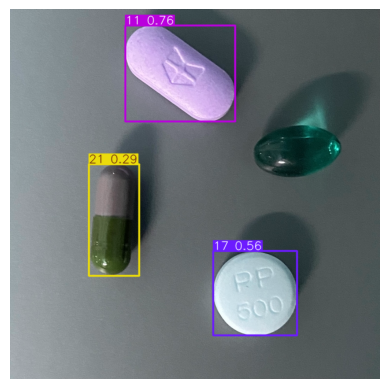

In [11]:
# Load the YOLO model (replace with your trained model path)
model_path = "D:/Pill_Identification/YOLOv8/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

# Define path to test image
# image_test_path = 'C:/Users/admin/Documents/GitHub/Pill_Identification/train/images/3_MT_32.jpg'
image_test_path = 'D:/Pill_Identification/Datasets/Test_multiple_pill/IMG_E3177.jpg'

# Call predict methods
results = model.predict(source=image_test_path, imgsz=640)

# Plot the results
test_image = results[0].plot(line_width=2)
plt.imshow(test_image)
plt.axis("off")
plt.show()